In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.makedirs('../plots', exist_ok=True)
df = pd.read_csv('..\\data\\NIFTY50_data.csv')

In [3]:
df.describe()

,Close,High,Low,Open,Volume
count,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03
mean,10231.869725,10293.690099,10167.414947,10238.603509,2.058828e+05
std,5665.199715,5684.555732,5644.648061,5669.000113,2.076375e+05
min,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00
25%,5607.850098,5649.750000,5561.750000,5609.850098,0.000000e+00
50%,8513.799805,8549.500000,8448.250000,8505.849609,1.811000e+05
75%,12263.549805,12293.900391,12213.799805,12271.000000,2.861000e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4277 non-null   str    
 1   Close   4277 non-null   float64
 2   High    4277 non-null   float64
 3   Low     4277 non-null   float64
 4   Open    4277 non-null   float64
 5   Volume  4277 non-null   int64  
dtypes: float64(4), int64(1), str(1)
memory usage: 200.6 KB


In [5]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,Close,High,Low,Open,Volume
Close,1.000000,0.999929,0.999930,0.999852,0.510060
High,0.999929,1.000000,0.999885,0.999940,0.511733
Low,0.999930,0.999885,1.000000,0.999905,0.508356
Open,0.999852,0.999940,0.999905,1.000000,0.510625
Volume,0.510060,0.511733,0.508356,0.510625,1.000000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

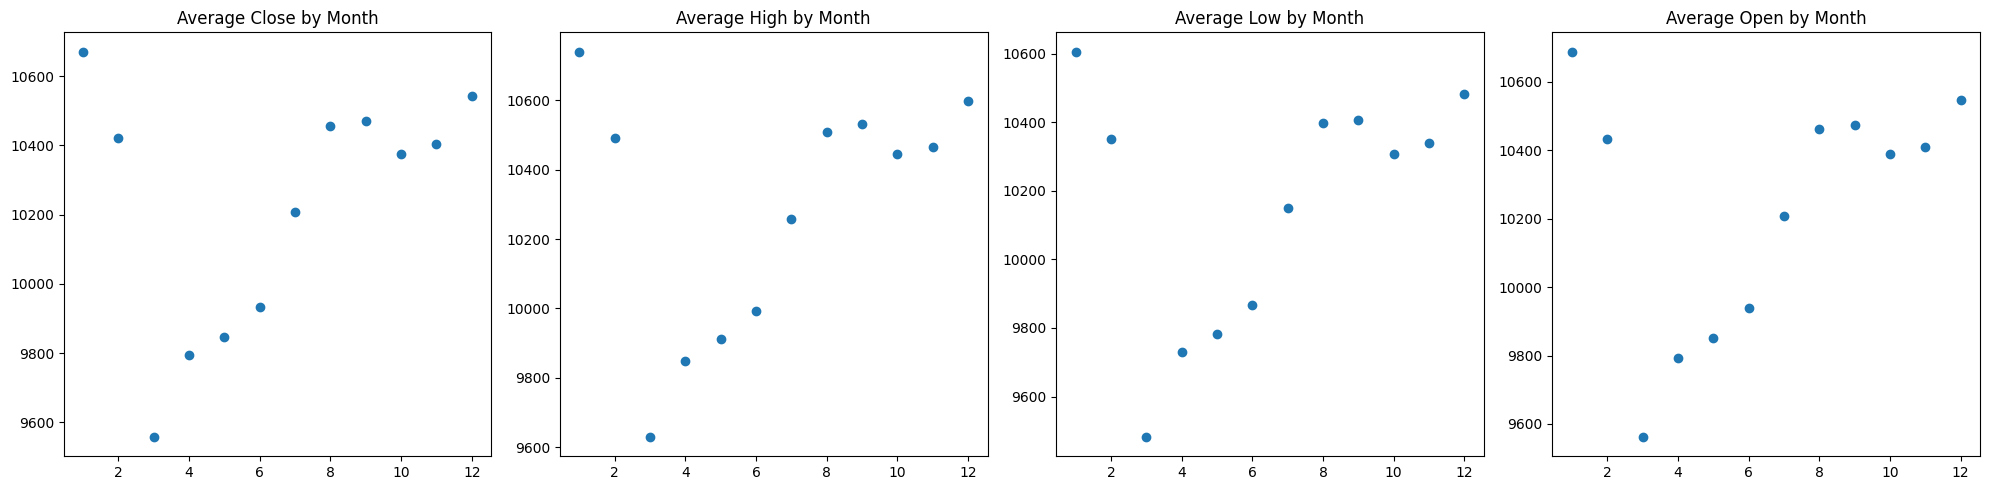

In [8]:
monthly = df.groupby(df.index.month).mean()

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].scatter(monthly.index, monthly['Close'])
ax[0].set_title('Average Close by Month')

ax[1].scatter(monthly.index, monthly['High'])
ax[1].set_title('Average High by Month')

ax[2].scatter(monthly.index, monthly['Low'])
ax[2].set_title('Average Low by Month')

ax[3].scatter(monthly.index, monthly['Open'])
ax[3].set_title('Average Open by Month')

plt.tight_layout()
plt.show()

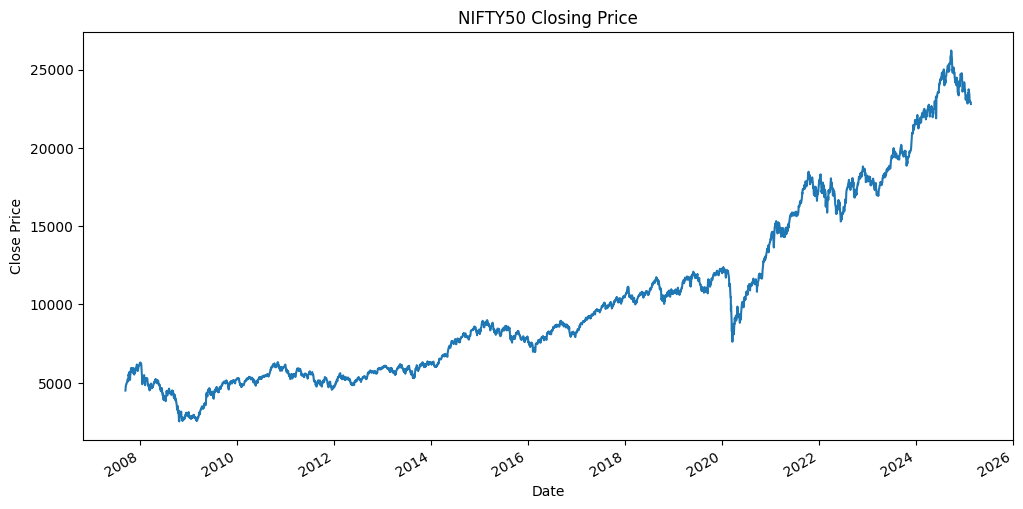

In [9]:
df['Close'].plot(figsize=(12, 6))
plt.title('NIFTY50 Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

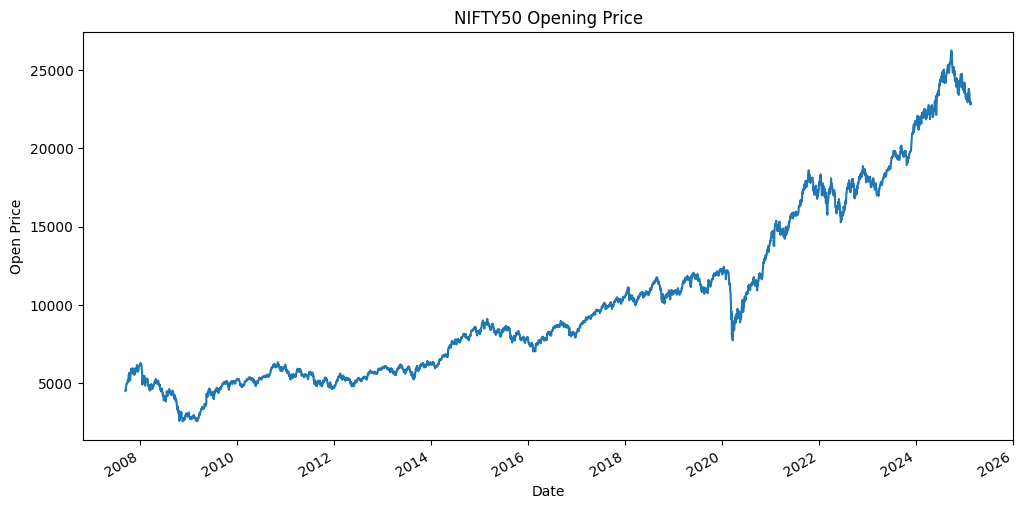

In [10]:
df['Open'].plot(figsize=(12, 6))        
plt.title('NIFTY50 Opening Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

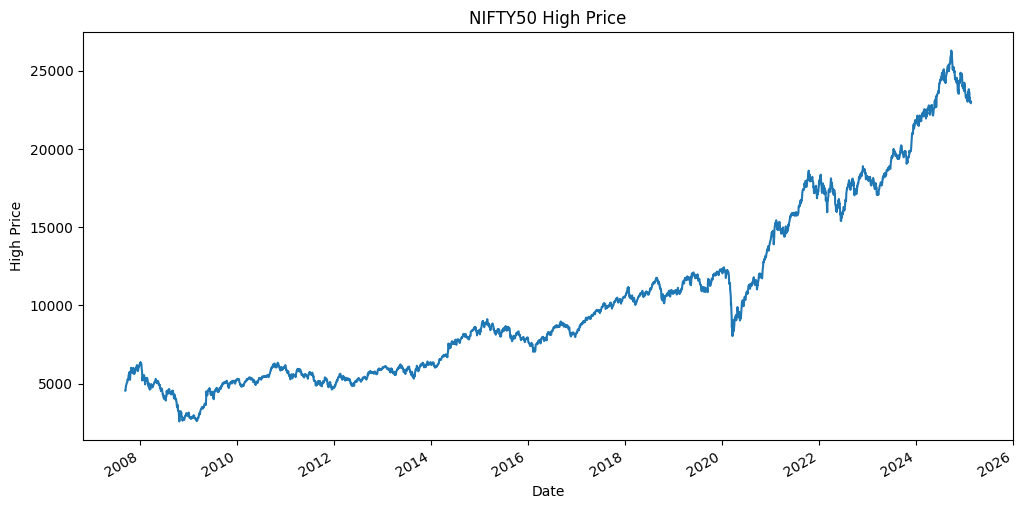

In [11]:
df['High'].plot(figsize=(12, 6))
plt.title('NIFTY50 High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

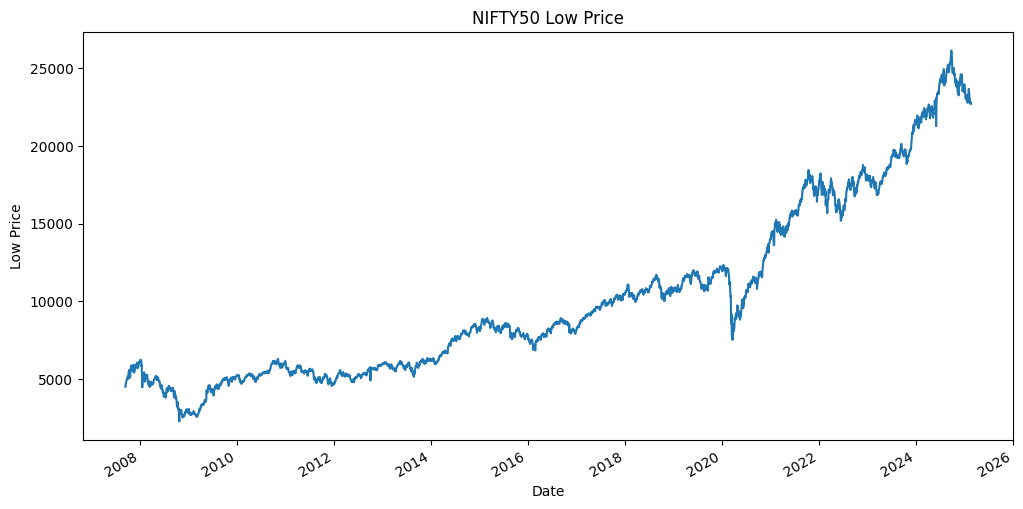

In [12]:
df['Low'].plot(figsize=(12, 6))     
plt.title('NIFTY50 Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

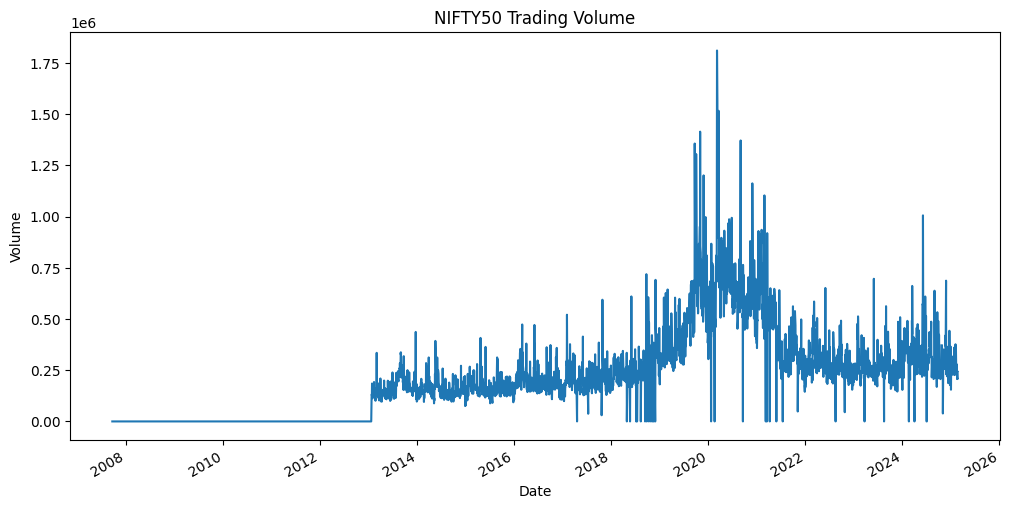

In [13]:
df['Volume'].plot(figsize=(12, 6))
plt.title('NIFTY50 Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

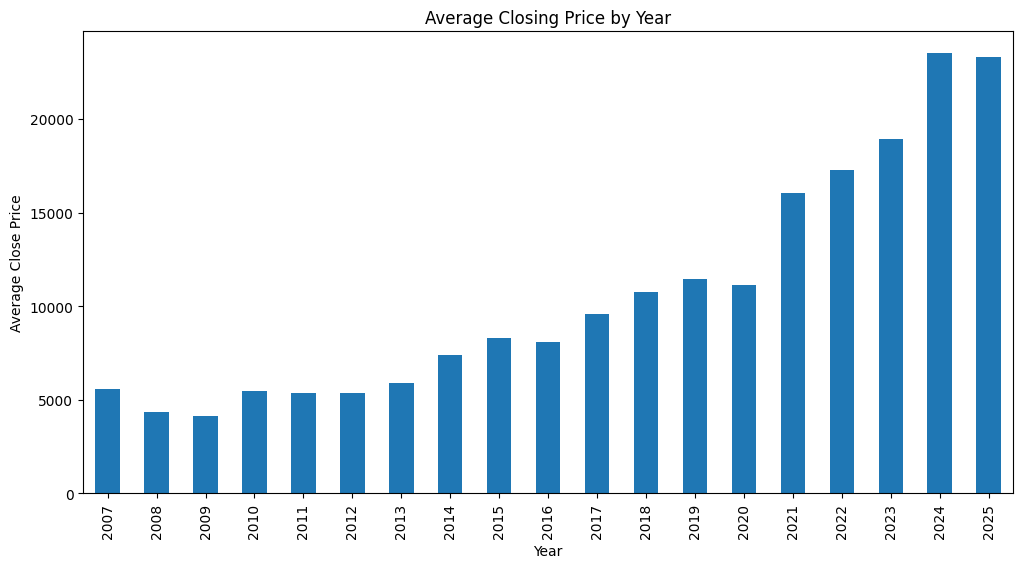

In [14]:
df.groupby(df.index.year)['Close'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.savefig("../plots/Average_Close_Price.png", dpi=300, bbox_inches='tight')
plt.show()

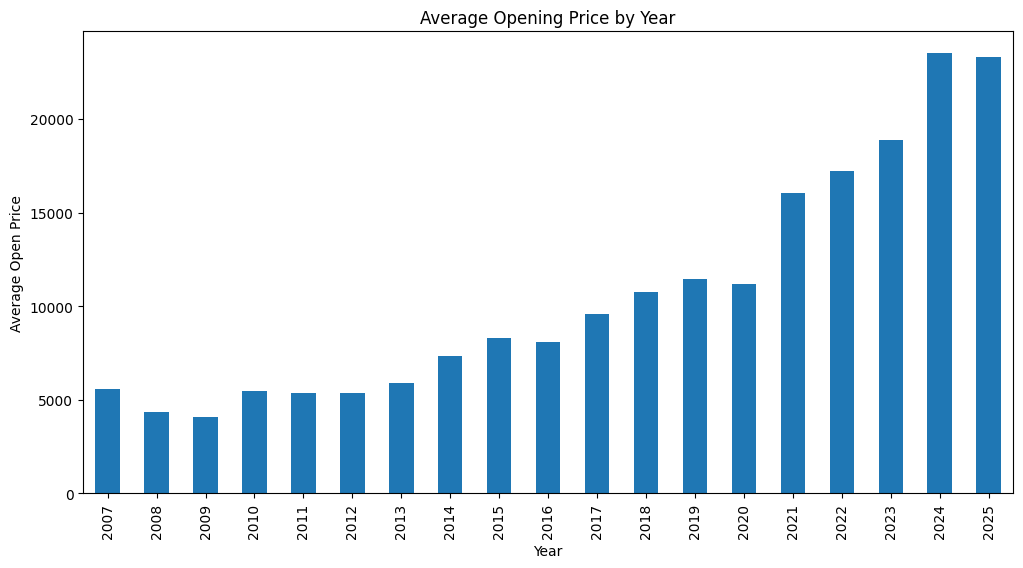

In [15]:
df.groupby(df.index.year)['Open'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Opening Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Open Price')
plt.savefig("../plots/Average_Open_Price.png", dpi=300, bbox_inches='tight')
plt.show()

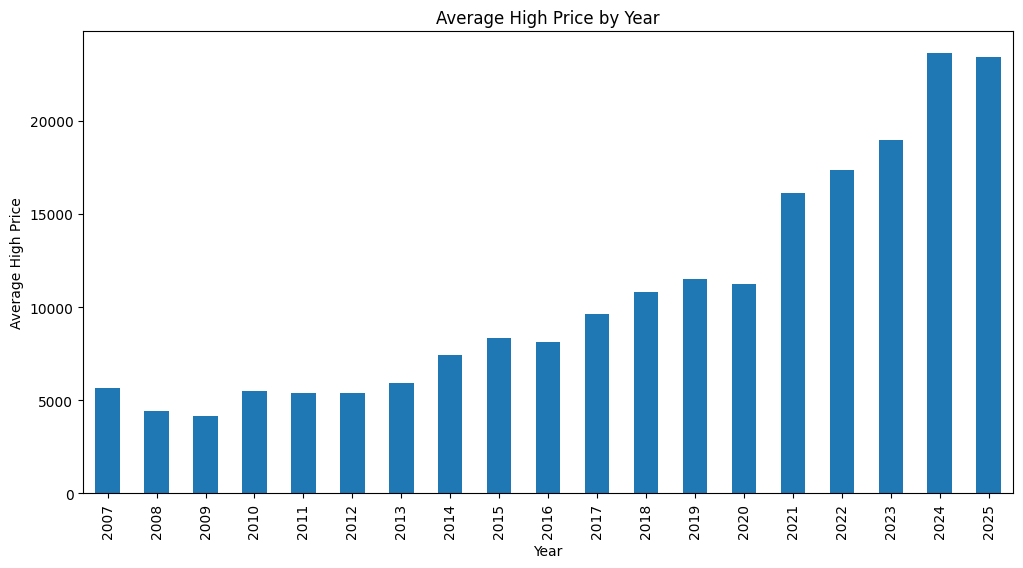

In [16]:
df.groupby(df.index.year)['High'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average High Price by Year')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.savefig("../plots/Average_High_Price.png", dpi=300, bbox_inches='tight')
plt.show()

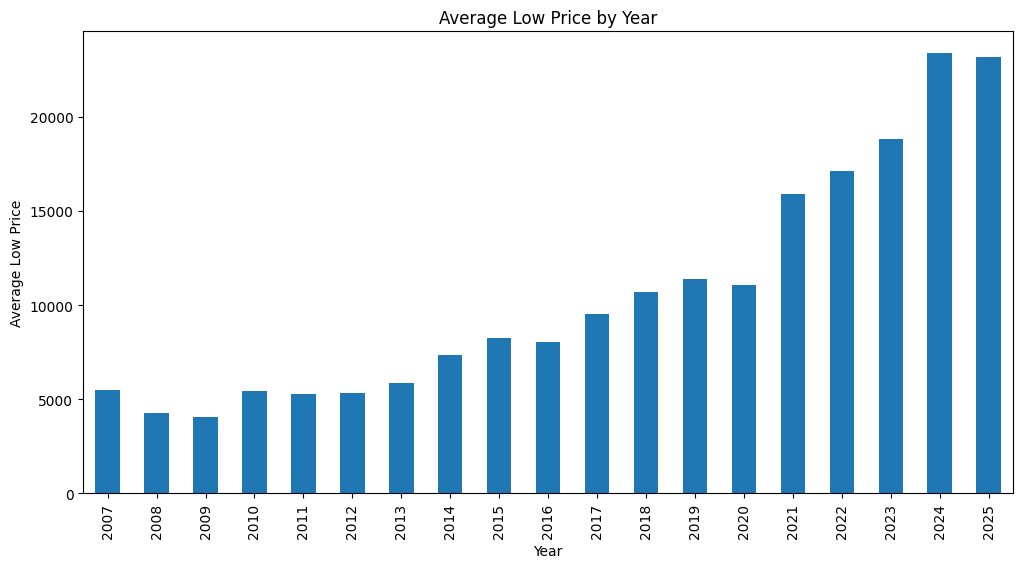

In [17]:
df.groupby(df.index.year)['Low'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Low Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Low Price')
plt.savefig("../plots/Average_Low_Price.png", dpi=300, bbox_inches='tight')
plt.show()

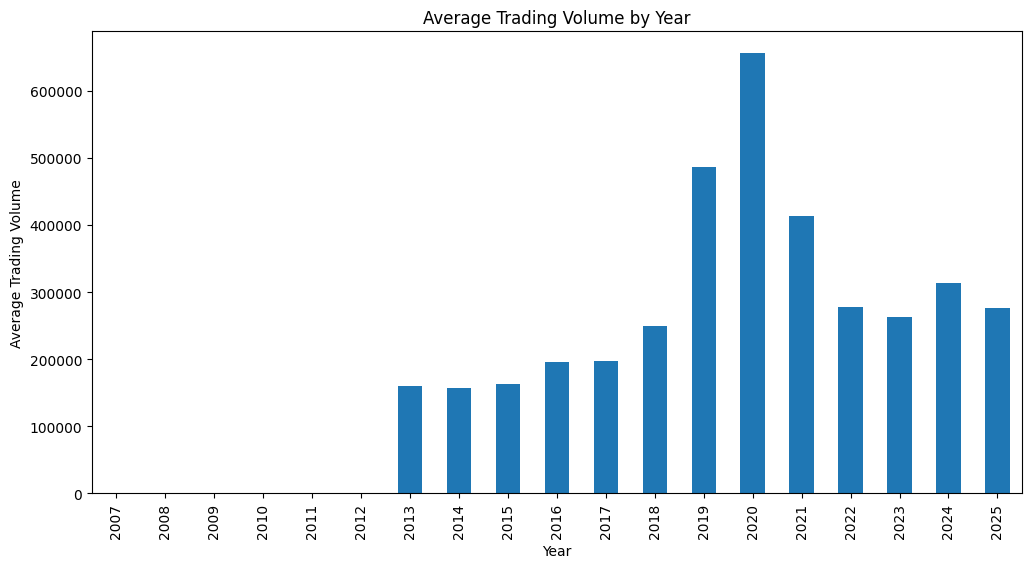

In [18]:
df.groupby(df.index.year)['Volume'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Trading Volume')
plt.savefig("../plots/Average_Volume.png", dpi=300, bbox_inches='tight')
plt.show()

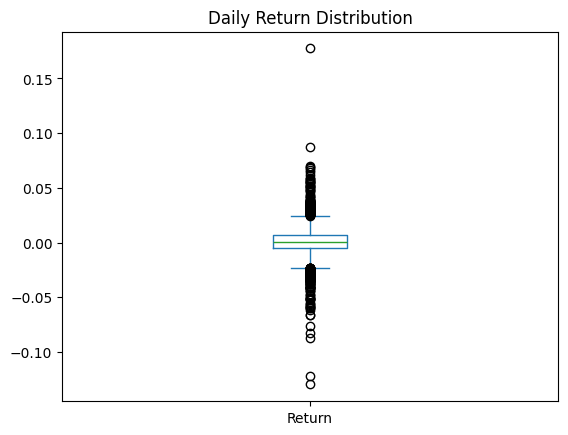

In [19]:
df['Return'] = df['Close'].pct_change()

df[['Return']].plot(kind='box')
plt.title("Daily Return Distribution")
plt.savefig("../plots/Daily_Return_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

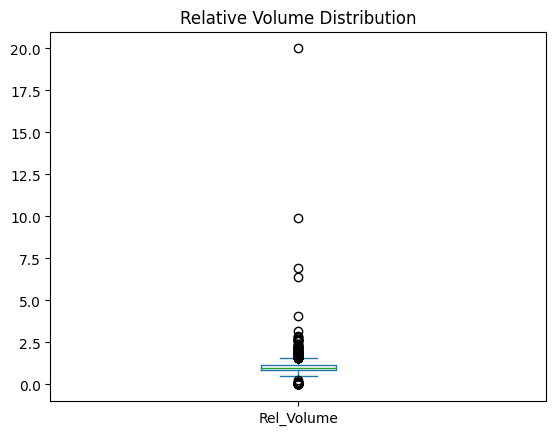

In [20]:
df['Rel_Volume'] = df['Volume'] / df['Volume'].rolling(20).mean()
df['Rel_Volume'].plot(kind='box')
plt.title("Relative Volume Distribution")
plt.savefig("../plots/Relative_Volume_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df.head()

,Close,High,Low,Open,Volume,Return,Rel_Volume
Date,,,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0,NaN,NaN
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0,0.011469,NaN
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0,0.040946,NaN
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0,0.003212,NaN
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0,0.018957,NaN


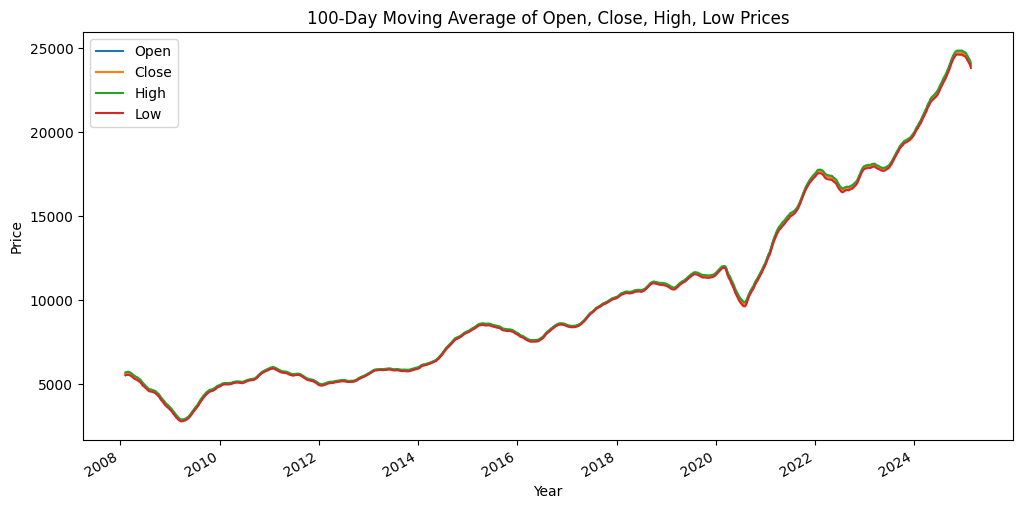

In [22]:
df[['Open', 'Close', 'High', 'Low']].rolling(100).mean().plot(figsize=(12, 6))
plt.title('100-Day Moving Average of Open, Close, High, Low Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig("../plots/100_Day_Moving_Average.png", dpi=300, bbox_inches='tight')
plt.show()

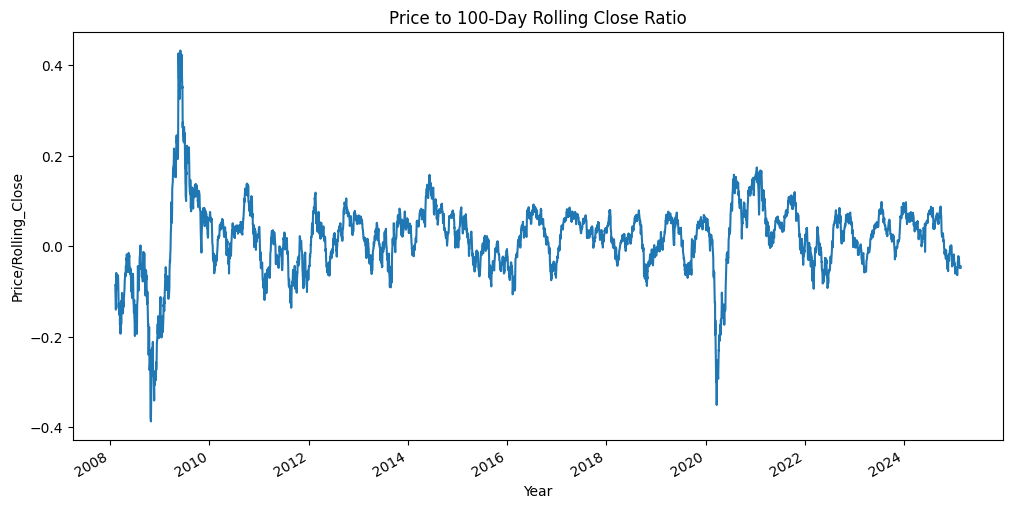

In [23]:
window_100 = df['Close'].rolling(window=100).mean()
df['Price/Rolling_Close'] = (df['Close'] - window_100)/ window_100
df['Price/Rolling_Close'].plot(figsize=(12, 6))
plt.title('Price to 100-Day Rolling Close Ratio')
plt.xlabel('Year')
plt.ylabel('Price/Rolling_Close')
plt.savefig("../plots/Price_to_Rolling_Close_Ratio.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
df.rename(columns={'Price/Rolling_Close': 'Trend100'}, inplace=True)